<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 4: Generate Descriptive Statistics and Visualizations
For the "Median value of owner-occupied homes" provide a boxplot

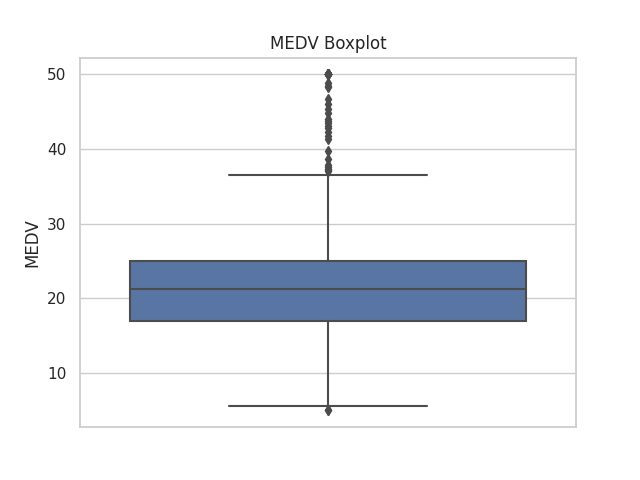

In [21]:
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.title("MEDV Boxplot")
plt.show()

Provide a  bar plot for the Charles river variable

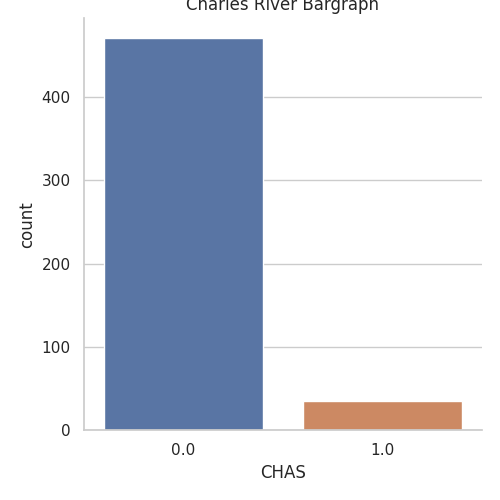

In [28]:
sns.set(style="whitegrid")
ax = sns.catplot(x="CHAS",kind="count",data=boston_df)
plt.title("Charles River Bargraph")
plt.show()

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

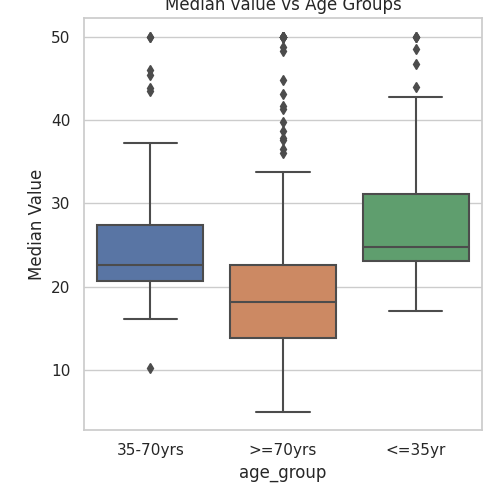

In [35]:
boston_df.loc[(boston_df.AGE <= 35), 'age_group'] = '<=35yr'
boston_df.loc[((boston_df.AGE > 35)&(boston_df.AGE < 70)), 'age_group'] = '35-70yrs'
boston_df.loc[(boston_df.AGE >= 70), 'age_group'] = '>=70yrs'

ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title("Median value vs Age Groups")
plt.ylabel("Median Value");
plt.show()

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

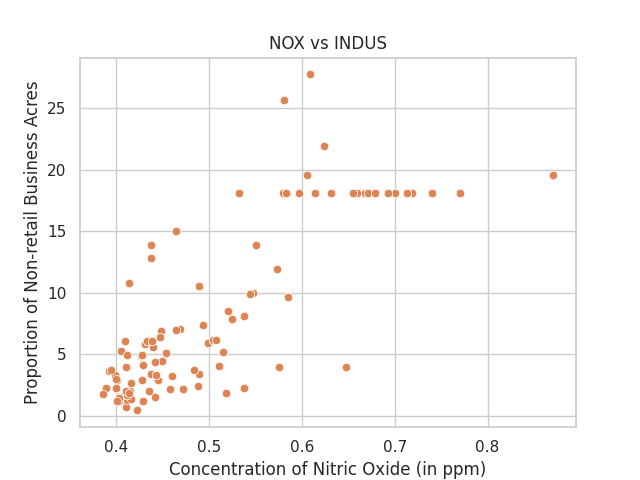

In [27]:
ax = sns.scatterplot(x='NOX', y='INDUS',
                     data=boston_df)
plt.title("NOX vs INDUS")
plt.xlabel("Concentration of Nitric Oxide (in ppm)")
plt.ylabel("Proportion of Non-retail Business Acres");
plt.show()

There is a weak correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town as the graph fails to show a strong linear relationship.

Create a histogram for the pupil to teacher ratio variable

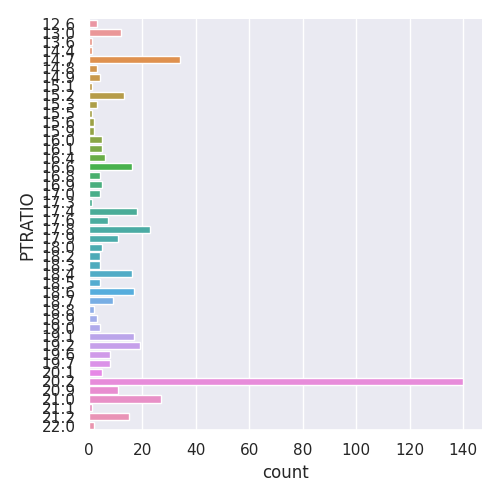

In [41]:
sns.catplot(y="PTRATIO",kind="count", data=boston_df)
plt.show()

## Task 5: Use the appropriate tests to answer the questions provided.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### Hypothesis
* $H\_0:u\_1=u\_2$ ("There is no signiicant difference in median value of houses bounded by the charles river")
* $H\_1:u\_1≠u\_2$ ("There is a signiicant difference in median value of houses bounded by the charles river")

In [43]:
scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 1].MEDV,
                     boston_df[boston_df.CHAS == 0].MEDV)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

#### Conclusions:
Since the pvalue determined by the independent t-test is less than the alpha of 0.05, we can reject the null hypothesis and state that there is a significant difference in median vaue of houses bounded by the charles river.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)?

#### Hypothesis

* $H\_0:u\_1=u\_2$ ("There is no signiicant difference in median value of houses for each proportion of owner occupied units built prior to 1940")
* $H\_1:u\_1≠u\_2$ ("There is a signiicant difference in median value of houses for each proportion of owner occupied units built prior to 1940")

In [49]:
boston_df.loc[(boston_df.AGE > 81), 'age_span'] = '<1940'
boston_df.loc[(boston_df.AGE <= 81), 'age_span'] = '>1940'

scipy.stats.levene(boston_df[boston_df.age_span=='<1940']['MEDV'],
                  boston_df[boston_df.age_span=='>1940']['MEDV'],
                  center='mean')

LeveneResult(statistic=1.587082228964923, pvalue=0.2083265383143275)

#### Conclusions:
Since the p-value of the anova test is greater than the alpha of 0.05 we fail to reject the null hypothesis that there is no significiant difference in median value of houses for each proportion of owner occupied units bulti prior to 1940.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

## Hypothesis 
* $H\_0:("There is no correlation between Nitric Oxide concentrations and proportion of non-retail business acres per town.")

* $H\_1:("There is a correlation between Nitric Oxide concentrations and proportion of non-retail business acres per town.")

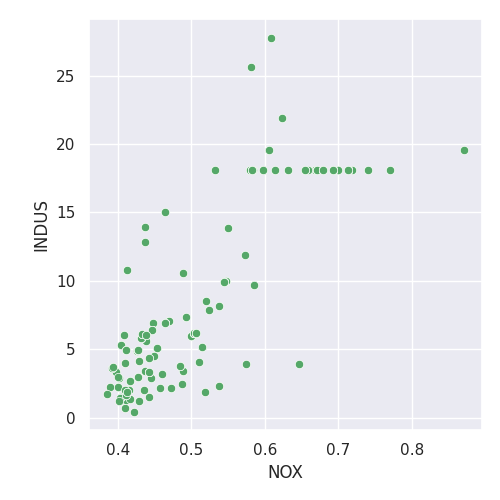

(0.7636514469209189, 7.913361061211254e-98)

In [47]:
ax = sns.scatterplot(x="NOX",y="INDUS",data=boston_df)
plt.show()
scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])

#### Conclusions:
Since the p-value of the pearson test is less than the alpha of 0.05 we reject the null hypothesis that there is no correlation between Nitric Oxide concentrations and proportion of non-retail business acres per town.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)







In [48]:
import statsmodels.api as sm
X = boston_df['DIS']

y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 27 May 2023   Prob (F-statistic):           1.21e-08
Time:                        09:32:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is an additional weighted distance of 1.0916 to the five Boston employment centres on the median value of owner occupied homes

### Written by Anthony Gisolfi